**NOTES:**
1. 数据探索这一过程，不产生任何数据，仅通过数据分析工具，了解数据更多信息。

2. 以便后续的特征工程与特征优化



### 数据读取

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

"""
读取数据集
"""
number_rows = 100000
test_data = pd.read_csv('./data_format1/test_format1.csv')
train_data = pd.read_csv('./data_format1/train_format1.csv')

user_info = pd.read_csv('./data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data_format1/user_log_format1.csv', nrows = number_rows)

#user_info = pd.read_csv('./data_format1/user_info_format1.csv').drop_duplicates()
#user_log = pd.read_csv('./data_format1/user_log_format1.csv').rename(columns={"seller_id":'merchant_id'})

### 数据集样例查看

In [11]:
# print (train_data.head())
# print (test_data.head())
# print (user_info.head())
print (user_log.head())
print (type(test_data['prob'][0]))

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type
0   328862   323294     833       2882    2661.0         829            0
1   328862   844400    1271       2882    2661.0         829            0
2   328862   575153    1271       2882    2661.0         829            0
3   328862   996875    1271       2882    2661.0         829            0
4   328862  1086186    1271       1253    1049.0         829            0
<class 'numpy.float64'>


## 单变量数据分析

### 数据类型和数据大小

**用户信息数据**

1. 数据集中共有2个float64类型和1个int64类型的数据
2. 数据大小9.7MB
3. 数据集共有424170条数据

In [15]:
print (user_info.isna().sum())
user_info.info()

user_id         0
age_range    2217
gender       6436
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
user_id      424170 non-null int64
age_range    421953 non-null float64
gender       417734 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


**用户行为数据**

1. 数据集中共有6个int64类型和1个float64类型的数据
2. 数据大小2.9GB
3. 数据集共有54925330条数据

In [19]:
print (user_log.info())
user_log.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
user_id        100000 non-null int64
item_id        100000 non-null int64
cat_id         100000 non-null int64
seller_id      100000 non-null int64
brand_id       99885 non-null float64
time_stamp     100000 non-null int64
action_type    100000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.3 MB
None


user_id          0
item_id          0
cat_id           0
seller_id        0
brand_id       115
time_stamp       0
action_type      0
dtype: int64

**用户购买训练数据**

1. 数据均为int64类型
2. 数据大小6MB
3. 数据集共有260864条数据

In [21]:
train_data.info()
# train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
user_id        260864 non-null int64
merchant_id    260864 non-null int64
label          260864 non-null int64
dtypes: int64(3)
memory usage: 6.0 MB


### 缺失值查看

**用户信息数据缺失**

对于缺失信息：
1. 毫无疑问，内容为空肯定算是缺失
2. 观察数据内部特征，有些没有意义的信息，比如这里的0，也视为缺失

Result：
1. 年龄值为空的缺失率为0.5%
2. 年龄值缺失或者年龄值为缺省值0

In [32]:
print ((user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0])
user_info.isna().sum()/user_info.shape[0]
print (user_info[user_info['age_range'].isna() | user_info['age_range'] == 0].count())
print (user_info.groupby(['age_range'])[['user_id']].count())

0.005226677982884221
user_id      92914
age_range    92914
gender       90638
dtype: int64
           user_id
age_range         
0.0          92914
1.0             24
2.0          52871
3.0         111654
4.0          79991
5.0          40777
6.0          35464
7.0           6992
8.0           1266


**性别缺失**
1. 性别值为空的缺失率 1.5%
2. 性别值缺失或者性别为缺省值2
3. 共计16862条数据

In [35]:
print ((user_info.shape[0]-user_info['gender'].count())/user_info.shape[0])
print (user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count())
print (user_info.groupby(['gender'])[['user_id']].count())

0.01517316170403376
user_id      16862
age_range    14664
gender       10426
dtype: int64
        user_id
gender         
0.0      285638
1.0      121670
2.0       10426


**年龄或者性别其中有一个有缺失**

共计106330条数据

In [17]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0) | user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

**用户行为日志信息**

brand_id字段有91015条缺失数据

In [36]:
user_log.isna().sum()

user_id          0
item_id          0
cat_id           0
seller_id        0
brand_id       115
time_stamp       0
action_type      0
dtype: int64

## 观察数据分布

### 整体数据统计信息

In [37]:
print (user_info.describe())
print (user_log.describe())

             user_id      age_range         gender
count  424170.000000  421953.000000  417734.000000
mean   212085.500000       2.930262       0.341179
std    122447.476178       1.942978       0.524112
min         1.000000       0.000000       0.000000
25%    106043.250000       2.000000       0.000000
50%    212085.500000       3.000000       0.000000
75%    318127.750000       4.000000       1.000000
max    424170.000000       8.000000       2.000000
            user_id       item_id        cat_id      seller_id      brand_id  \
count  100000.00000  1.000000e+05  100000.00000  100000.000000  99885.000000   
mean   227448.46862  5.546918e+05     878.72768    2417.144320   4170.051579   
std    117897.68365  3.227018e+05     446.70338    1467.226216   2367.888121   
min        16.00000  2.000000e+00       1.00000       1.000000      1.000000   
25%    132295.00000  2.721400e+05     563.00000    1102.000000   2031.000000   
50%    241784.00000  5.561470e+05     826.00000    2403.00000

### 查看正负样本的分布

0    244912
1     15952
Name: label, dtype: int64


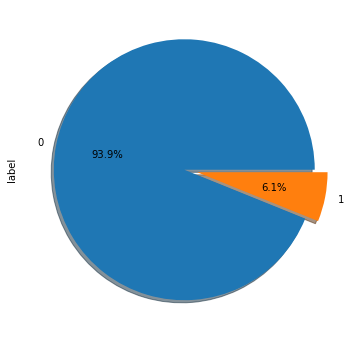

In [51]:
# series type
print (train_data.label.value_counts())
_, axe = plt.subplots(1,1,figsize=(6,6))
train_data.groupby('label')['label'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe)
# test_data['label'].value_count()

正负样本的数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64
0.9388493621197253


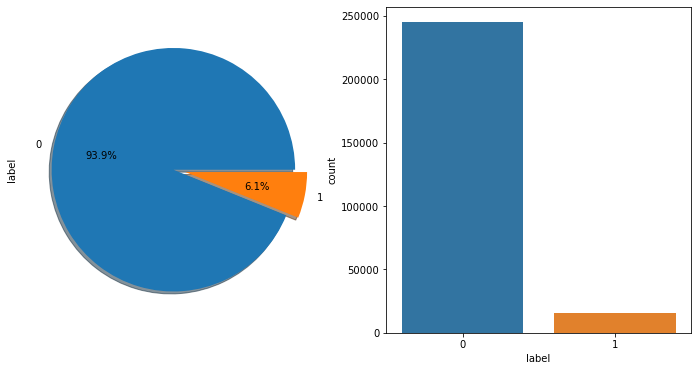

In [40]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot('label',data=train_data,ax=axe[1],)
print ((244912)/(244912+15952))

从上图可以看出，样本的分布不均衡，需要采取一定的措施处理样本不均衡的问题：

* 类似欠采样,将一份正样本和多分负样本组合成多分训练集,训练多个模型后求平均
* 调整模型的权重

## 探查店铺、用户、性别以及年龄对复购的影响

### 查看不同商家与复购的关系

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


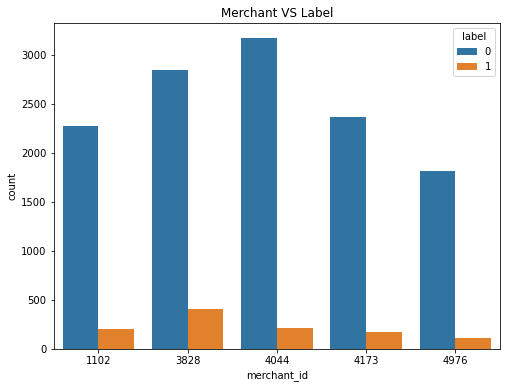

In [22]:
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8,6))
plt.title('Merchant VS Label')
ax = sns.countplot('merchant_id',hue='label',data=train_data_merchant)
for p in ax.patches:
    height = p.get_height()

从图可以看出不同店铺有不同复购率，可能与不同店铺售卖的商品有关，以及店铺的运营有关。

### 查看店铺复购概率分布

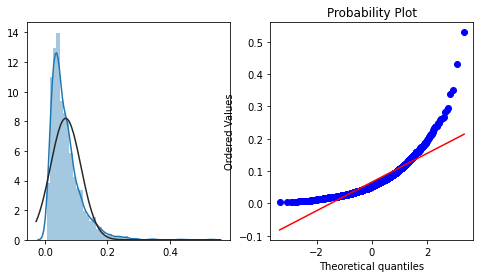

In [52]:
merchant_repeat_buy = [ rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0] 
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
# distplot 直方图与单变量分布很像欸
sns.distplot(merchant_repeat_buy, fit=stats.norm)
# QQ图，计算分位数，如何和红线拟合，则服从正态分布
ax=plt.subplot(1,2,2)
res = stats.probplot(merchant_repeat_buy, plot=plt)

可以看出不同店铺有不同复购率，大致在0-0.3之间

### 查看用户大于等于一次复购概率分布

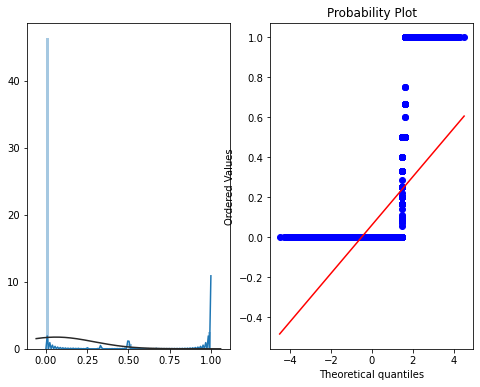

In [54]:
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate >= 0] 

plt.figure(figsize=(8,6))

ax=plt.subplot(1,2,1)
# 直方图是否拟合正态分布
sns.distplot(user_repeat_buy, fit=stats.norm)
# QQ图，与红线一致则近似正态分布
ax=plt.subplot(1,2,2)
res = stats.probplot(user_repeat_buy, plot=plt)

可以看出近6个月，用户复购率很小，基本买一次为主

In [55]:
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')

### 查看用户性别与复购的关系

如上的店铺，用户与复购率的分析，都是连续型变量统计分析方案。

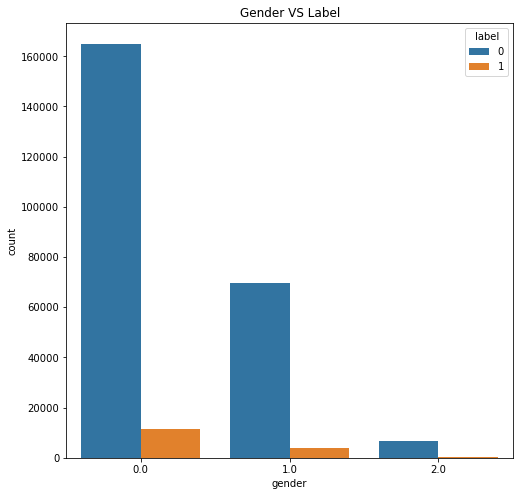

In [26]:
plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot('gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()

### 查看用户性别复购的分布
有屁用，groupby后只有三个值。还有判断分布的必要吗，还有QQ图的必要吗

[0.06454703141474033, 0.05381257118064971, 0.06902477445224116]


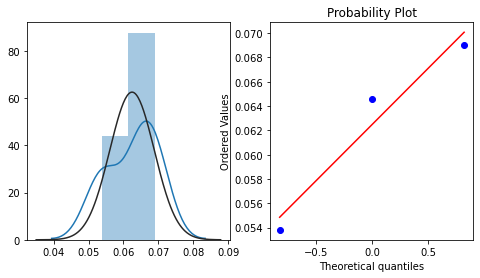

In [56]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()] 
print (repeat_buy)
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

可以看出男女的复购率不一样

### 查看用户年龄与复购的关系

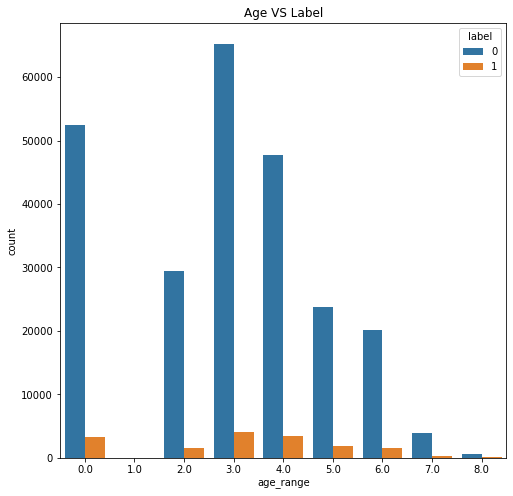

In [28]:
plt.figure(figsize=(8,8))
plt.title('Age VS Label')
ax = sns.countplot('age_range',hue='label',data=train_data_user_info)

### 查看用户年龄复购的分布

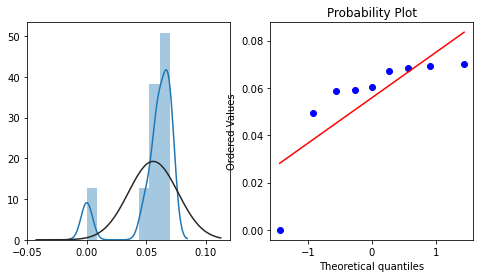

In [29]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

可以看出不同年龄段，复购概率不同